In [243]:
__author__ = 'AndreasBrotzer'


## import libraries
import os, sys, subprocess
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import datetime

from pylab import figtext

## __________________________________________________________________________________

## define variables
ring={1:'Z-Ring',2:'W-Ring',3:'N-Ring',4:'E-Ring'}

path = "/home/brotzer/Documents/Data/"

outpath  = "/home/brotzer/notebooks/figs"


# outname1 = "romy_20200714_cavity_lifetime"
# outname2 = "romy_20200714_cavity_lifetime_fit"
# outname3 = "romy_20200714_loop_diode"
outname1 = "20200901_b_cavity_lifetime"
outname2 = "20200901_b_cavity_lifetime_fit"



# file1 = "romy_cavity_lifetime/20200714_cavity_liftime_1.csv"
# file2 = "romy_cavity_lifetime/20200714_cavity_liftime_2.csv"
# file3 = "romy_cavity_lifetime/20200714_cavity_liftime_3.csv"
# file4 = "romy_cavity_lifetime/20200714_cavity_liftime_4.csv"
file1 = "romy_cavity_lifetime/20200901_cavity_lifetime_b1.csv"
file2 = "romy_cavity_lifetime/20200901_cavity_lifetime_b2.csv"
file3 = "romy_cavity_lifetime/20200901_cavity_lifetime_b3.csv"



outname3 = "romy_20200901_loop_diode"

file5 = "romy_regelung_jan_01.log"
file6 = "romy_regelung_jan_02.log"




In [244]:
## method to retrieve data from log-file and store it as dataframe 
def get_data(path_name,file_name,head,cols):
       
    ''' dependencies: 
            import os 
            import pandas as pd
    '''
   
    ## try to find and read mjd-files of ROMY
    if os.path.exists(path_name+file_name):
        
        if cols == 3:
            df = pd.read_csv(path_name+file_name,delimiter=',',header=head,names=['time','amp','empty'])
        elif cols == 2:
            df = pd.read_csv(path_name+file_name,delimiter=',',header=head,names=['time','amp'])

        df['time'] = pd.to_numeric(df['time'], errors='coerce')
        df['amp']  = pd.to_numeric(df['amp'], errors='coerce')
        
    else:
        print('\n!!! ERROR IMPORTING!!! \n \n--> Possibliy file does not exist?!   {}\n'.format(path_name+file_name))
        return
    
    ## print file name 
    print('\n reading   {} ... \n'.format(file_name))    
       
    
    ## print top of file 
    print(df.head(2))
    print(df.tail(2))
    
    ## print number of rows
    rows,cols=df.shape
    print('\n number of rows: {} \n number of columns: {} \n'.format(rows,cols))


    return df

In [245]:
def save_to_pdf(figs,outpath,outname):
    ''' Saving figures in array figs continously to pdf-file''' 
    
    import matplotlib.backends.backend_pdf
    pdf = matplotlib.backends.backend_pdf.PdfPages("{}/ROMY_{}.pdf".format(outpath,outname))
    
    for f in figs: 
        pdf.savefig( f )
    pdf.close()
    

In [246]:

df1 = get_data(path,file1,2,3)
df2 = get_data(path,file2,2,3)
df3 = get_data(path,file3,2,3)
#df4 = get_data(path,file4,2,3)

df4 =  df1.copy()
df4['amp'] = df4['amp']*0


 reading   romy_cavity_lifetime/20200901_cavity_lifetime_b1.csv ... 

      time    amp empty
0 -0.00099  0.292      
1 -0.00098  0.296      
        time    amp empty
597  0.00498 -0.004      
598  0.00499 -0.004      

 number of rows: 599 
 number of columns: 3 


 reading   romy_cavity_lifetime/20200901_cavity_lifetime_b2.csv ... 

      time    amp empty
0 -0.00099  0.284      
1 -0.00098  0.276      
        time    amp empty
597  0.00498 -0.004      
598  0.00499 -0.004      

 number of rows: 599 
 number of columns: 3 


 reading   romy_cavity_lifetime/20200901_cavity_lifetime_b3.csv ... 

      time    amp empty
0 -0.00099  0.268      
1 -0.00098  0.264      
        time    amp empty
597  0.00498 -0.004      
598  0.00499 -0.008      

 number of rows: 599 
 number of columns: 3 



In [247]:
from scipy import optimize

def fit_exp(xarr,yarr,cut):
    def exponential(x, a, k, b):
        return a*np.exp(x*k) + b

    popt_exponential, pcov_exponential = optimize.curve_fit(exponential, xarr[cut:], yarr[cut:], p0=[0.7,-1/0.0004, 1])
#     popt_exponential, pcov_exponential = optimize.curve_fit(exponential, xarr[cut:], yarr[cut:], p0=[-1,0.5, 1])

    y = popt_exponential[0]*np.exp(popt_exponential[1]*  xarr[cut:]) + popt_exponential[2]
    
    return y , popt_exponential[1]

Lifetime Run1: 0.651 ms
Lifetime Run1: 0.664 ms
Lifetime Run1: 0.675 ms
Lifetime Run1: 0.400 ms

Average Lifetime: (0.597 +- 0.114) ms

Quality Factor: 178e11

Resonator Bandwidth: 266 Hz
549
549


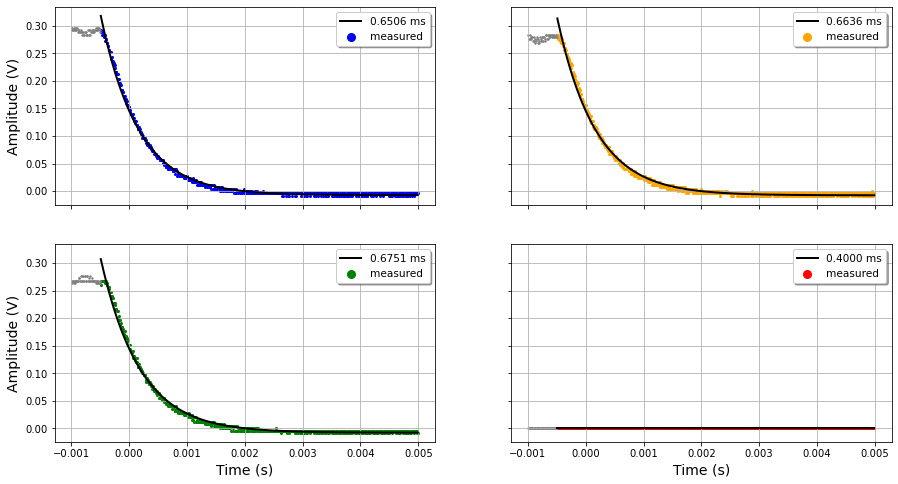

In [251]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8),sharex=True,sharey=True)

# cutoff1=105
# cutoff2=110
# cutoff3=115
# cutoff4=111
# cutoff1=65
# cutoff2=65
# cutoff3=65
# cutoff4=65
cutoff1=50
cutoff2=50
cutoff3=50
cutoff4=50


y1 ,t1 = fit_exp(df1['time'],df1['amp'],cutoff1)
y2 ,t2 = fit_exp(df2['time'],df2['amp'],cutoff2)
y3 ,t3 = fit_exp(df3['time'],df3['amp'],cutoff3)
y4 ,t4 = fit_exp(df4['time'],df4['amp'],cutoff4)


taus=np.array([-1/t1,-1/t2,-1/t3,-1/t4])
f0 = 474*1e12 # Hz


for tt in taus:
    print("Lifetime Run1: {:.3f} ms".format(tt*1e3))

print("\nAverage Lifetime: ({:.3f} +- {:.3f}) ms".format(taus.mean()*1e3, taus.std()*1e3))

print("\nQuality Factor: {:.0f}{}".format(2*np.pi*f0*taus.mean()*10e-11,'e11'))

print("\nResonator Bandwidth: {:.0f} Hz".format(1/(2*np.pi*taus.mean())))


sizing = 4
fonts = 14

print(len(df1['time'][cutoff1:]))
print(len(y1))

ax1.scatter(df1['time'][cutoff1:],df1['amp'][cutoff1:],s=sizing,label='measured',color='b')
ax1.scatter(df1['time'][:cutoff1],df1['amp'][:cutoff1],s=sizing/2,color='grey')
ax1.plot(df1['time'][cutoff1:],y1,'k',label="%5.4f ms"%(-1/t1*1e3), linewidth=2 )



## logarithmic plot
# ax1.semilogx(df1['time'][cutoff1:],y1,'k',label="%5.4f ms"%(1/t1*1000) )
# ax1.set_xlim(2e-3,1e-4)


ax2.scatter(df2['time'][cutoff2:],df2['amp'][cutoff2:],s=sizing,label='measured',color='orange')
ax2.scatter(df2['time'][:cutoff2],df2['amp'][:cutoff2],s=sizing/2,color='grey')
ax2.plot(df2['time'][cutoff2:],y2,'k',label="%5.4f ms"%(1/-t2*1e3), linewidth=2 )

ax3.scatter(df3['time'][cutoff3:],df3['amp'][cutoff3:],s=sizing,label='measured',color='g')
ax3.scatter(df3['time'][:cutoff3],df3['amp'][:cutoff3],s=sizing/2,color='grey')
ax3.plot(df3['time'][cutoff3:],y3,'k',label="%5.4f ms"%(1/-t3*1e3), linewidth=2 )

ax4.scatter(df4['time'][cutoff4:],df4['amp'][cutoff4:],s=sizing,label='measured',color='r')
ax4.scatter(df4['time'][:cutoff4],df4['amp'][:cutoff4],s=sizing/2,color='grey')
ax4.plot(df4['time'][cutoff4:],y4,'k',label="%5.4f ms"%(1/-t4*1e3), linewidth=2 )



ax1.legend(markerscale=4,shadow=True,fontsize=fonts*3/4,loc='best')
ax1.grid('On',zorder=0)
ax2.legend(markerscale=4,shadow=True,fontsize=fonts*3/4,loc='best')
ax2.grid('On',zorder=0)
ax3.legend(markerscale=4,shadow=True,fontsize=fonts*3/4,loc='best')
ax3.grid('On',zorder=0)
ax4.legend(markerscale=4,shadow=True,fontsize=fonts*3/4,loc='best')
ax4.grid('On',zorder=0)

            
ax3.set_xlabel('Time (s)',fontsize=fonts)
ax4.set_xlabel('Time (s)',fontsize=fonts)

ax1.set_ylabel('Amplitude (V)',fontsize=fonts)
ax3.set_ylabel('Amplitude (V)',fontsize=fonts)

save_to_pdf([fig],outpath,outname2)

plt.show();

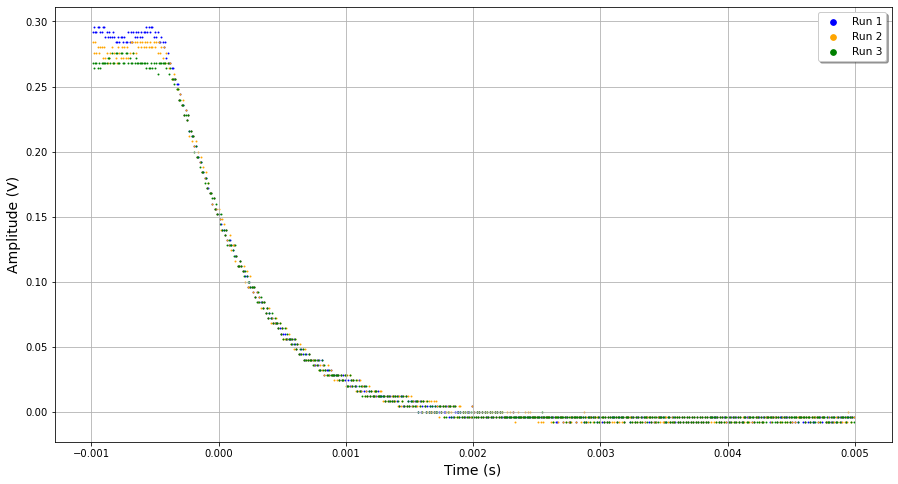

In [252]:
fig, ax = plt.subplots(1,1,figsize=(15,8))


sizing=0.9
fonts=14


ax.scatter(df1['time'],df1['amp'],s=sizing,label='Run 1',color='b')
ax.scatter(df2['time'],df2['amp'],s=sizing,label='Run 2',color='orange')
ax.scatter(df3['time'],df3['amp'],s=sizing,label='Run 3',color='g')
#ax.scatter(df4['time'],df4['amp'],s=sizing,label='Run 4',color='r')


# ax.plot(df1['time'],df1['amp'],label='Run 1',color='b')
# ax.plot(df2['time'],df2['amp'],label='Run 1',color='orange')
# ax.plot(df3['time'],df3['amp'],label='Run 1',color='g')
# #ax.plot(df4['time'],df4['amp'],label='Run 1',color='r')


ax.legend(markerscale=6,shadow=True,fontsize=fonts*3/4,loc='best')
ax.grid('On',zorder=0)

ax.set_xlabel('Time (s)',fontsize=fonts)
ax.set_ylabel('Amplitude (V)',fontsize=fonts)

save_to_pdf([fig],outpath,outname1)

plt.show();

In [253]:
df5 = get_data(path,file5,0,2); df5 = df5.rename(columns={'time':'diode','amp':'control'});
df6 = get_data(path,file6,0,2) ; df6 = df6.rename(columns={'time':'diode','amp':'control'});



 reading   romy_regelung_jan_01.log ... 

       time       amp
0  0.221939  1.843819
1  0.216980  1.843817
            time       amp
148833  0.210266  1.829421
148834  0.214386  1.829422

 number of rows: 148835 
 number of columns: 2 


 reading   romy_regelung_jan_02.log ... 

       time       amp
0  0.013962  0.150267
1  0.011978  0.150351
            time       amp
193860  0.215073  1.828668
193861  0.217972  1.828669

 number of rows: 193862 
 number of columns: 2 



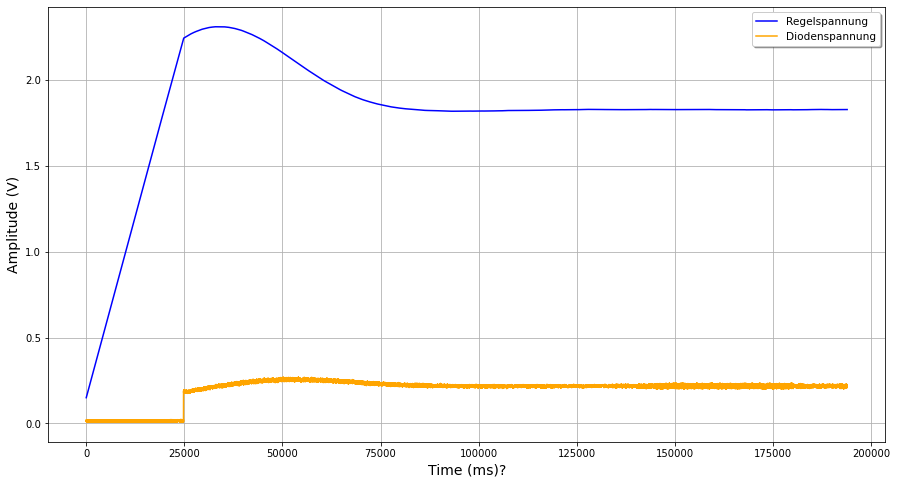

In [242]:
fig, ax = plt.subplots(1,1,figsize=(15,8))


sizing=0.9
fonts=14



ax.plot(df6['control'],label='Regelspannung',color='blue')
ax.plot(df6['diode'],label='Diodenspannung',color='orange')


ax.set_ylabel('Amplitude (V)',fontsize=fonts)
ax.set_xlabel('Time (ms)?',fontsize=fonts)

ax.legend(markerscale=6,shadow=True,fontsize=fonts*3/4,loc='best')
ax.grid('On',zorder=0)

save_to_pdf([fig],outpath,outname3)

plt.show();
